<center>
<h1> Tchoffo Ngnintedem Cyril -- 2SN B2 </h1>    
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des Régions de Confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy d’un sous-problème de
régions de confiance (fichier `Pas_De_Cauchy.jl`). La spécification de cet algorithme est donnée ci-dessous.

In [32]:
using LinearAlgebra
using Documenter
using Markdown  
include("Pas_De_Cauchy.jl")
# @doc Pas_De_Cauchy

Pas_De_Cauchy

2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du Pas de Cauchy. Vous créerez pour cela un fichier `tester_pas_de_Cauchy.jl` dans le répertoire `test` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [33]:

include("Pas_De_Cauchy.jl")

using Test


tol_erreur = sqrt(eps())

## ajouter les fonctions de test

include("../test/tester_pas_de_cauchy.jl") 
include("../test/fonctions_de_tests.jl")
include("../src/Pas_De_Cauchy.jl")

affiche = false

@testset "Test pas de cauchy " begin 
	tester_pas_de_cauchy(affiche , Pas_De_Cauchy) 
end;


Cauchy 4 = [5.000000000000001, -2.5000000000000004]
Cauchy 5= [4.47213595499958, -2.23606797749979]
Cauchy 6= [-4.743416490252569, -1.5811388300841895]
Cauchy 6= [-2.23606797749979, -4.47213595499958]
Test Summary:       | Pass  Total  Time
Test pas de cauchy  |    7      7  0.3s


3. Coder l'algorithme des Régions de Confiance (fichier `Regions_De_Confiance.jl`). Sa spécification est donnée ci-dessous.

In [17]:
include("Regions_De_Confiance.jl")
 #@doc Regions_De_Confiance

Regions_De_Confiance

4. Vérifier que les tests ci-dessous passent.

In [34]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Regions_De_Confiance.jl")

affiche = false 

@testset "Test rc avec cauchy" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

iters = 864.0
Test Summary:       | Pass  Total  Time
Test rc avec cauchy |   30     30  1.2s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit $$ f_{1} : \mathbf{R}^3 \rightarrow \mathbf{R}$$ $$ (x_1,x_2, x_3) \mapsto  2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2$$ Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de Newton et RC-Pas de Cauchy sur cette fonction.

2.  Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

In [102]:
#using Pkg; Pkg.add("LinearAlgebra"); Pkg.add("Markdown")
# using Documenter
using LinearAlgebra
using Markdown         

include("Pas_De_Cauchy.jl")
include("Regions_De_Confiance.jl")

# Affichage les sorties de l'algorithme des Régions de confiance
function my_afficher_resultats(algo,nom_fct,point_init,xmin,fxmin,flag,sol_exacte,nbiters)
	println("-------------------------------------------------------------------------")
	printstyled("Résultats de : ",algo, " appliqué à ",nom_fct, " au point initial ", point_init, ":\n",bold=true,color=:blue)
	println("  * xsol = ",xmin)
	println("  * f(xsol) = ",fxmin)
	println("  * nb_iters = ",nbiters)
	println("  * flag = ",flag)
    println("  * sol_exacte : ", sol_exacte)
end

################# Test sur les fonctions f1 et f2 décrites dans l'interpretation algo_newton################


# probleme 1   fonction f1 
f1(x) = 2*(x[1]+x[2]+x[3]-3)^2 + (x[1]-x[2])^2 + (x[2]-x[3])^2
grad_f1(x) = [4*(x[1]+x[2]+x[3]-3) + 2*(x[1]-x[2]);4*(x[1]+x[2]+x[3]-3) - 2*(x[1]-x[2]) + 2*(x[2]-x[3]) ;4*(x[1]+x[2]+x[3]-3) - 2*(x[2]-x[3]) ]
hessienne_f1(x) = [6. 2. 4. ; 2. 8. 2. ; 4. 2. 6.] 
x011 = [1; 0 ;8]
x012 = [12 ;3 ;-9]

sol_exacte = [1, 1, 1]

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hessienne_f1,x011,[])
my_afficher_resultats("Regions de confiance avec pas de Cauchy","f1",x011,xmin,fxmin,flag,sol_exacte,nb_iters)

 
xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hessienne_f1,x012,[])
my_afficher_resultats("Regions de confiance avec pas de Cauchy","f1",x012,xmin,fxmin,flag,sol_exacte,nb_iters)


-------------------------------------------------------------------------
Résultats de : Regions de confiance avec pas de Cauchy appliqué à f1 au point initial [1, 0, 8]:
  * xsol = [0.9999389818205328, 1.0000102958944665, 1.0000816099684005]
  * f(xsol) = 1.2079492253706104e-8
  * nb_iters = 33
  * flag = 2
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : Regions de confiance avec pas de Cauchy appliqué à f1 au point initial [12, 3, -9]:
  * xsol = [1.0000692656422616, 1.0000134330134607, 0.9999575981839249]
  * f(xsol) = 9.482481199237108e-9
  * nb_iters = 25
  * flag = 2
  * sol_exacte : [1, 1, 1]


In [104]:
#Comparaisons de performances en modifiant les paramètres eta1 et eta2
# probleme 2   fonction f2 
f2(x) = 100*(x[2]-x[1]^2)^2 + (1-x[1])^2
grad_f2(x) = [-400*x[1]*(x[2]-x[1]^2)-2*(1-x[1]); 200*(x[2]-x[1]^2)]
hessienne_f2(x) = [400*(3*x[1]^2 - x[2]) + 2    -400*x[1]   ; -400*x[1]   200]
x022 = [10. ; 0.0]
sol_exacte = [1, 1]



    
options = [10 0.5 2.0 0.05 0.7  2 30000 sqrt(eps()) 1e-15 1.e-2]

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f2,grad_f2,hessienne_f2,x022,options)
my_afficher_resultats("Regions de confiance avec pas de Cauchy eta1 et eta2 proches de 1 ","f2",x022,xmin,fxmin,flag,sol_exacte,nb_iters)

    
options = [10 0.5 2.0 0.25 0.75  2 30000 sqrt(eps()) 1e-15 1.e-2]

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f2,grad_f2,hessienne_f2,x022,options)
my_afficher_resultats("Regions de confiance avec pas de Cauchy eta1 et eta2 proches de 1 ","f2",x022,xmin,fxmin,flag,sol_exacte,nb_iters)



options = [10 0.5 2.0 0.4 0.9  2 30000 sqrt(eps()) 1e-15 1.e-2]

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f2,grad_f2,hessienne_f2,x022,options)
my_afficher_resultats("Regions de confiance avec pas de Cauchy eta1 et eta2 proches de 1 ","f2",x022,xmin,fxmin,flag,sol_exacte,nb_iters)


options = [10 0.5 2.0 0.99999 0.999999  2 30000 sqrt(eps()) 1e-15 1.e-2]

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f2,grad_f2,hessienne_f2,x022,options)
my_afficher_resultats("Regions de confiance avec pas de Cauchy eta1 et eta2 proches de 1 ","f2",x022,xmin,fxmin,flag,sol_exacte,nb_iters)



options = [10 0.5 2.0 0.999999 0.999999999  2 30000 sqrt(eps()) 1e-15 1.e-2]

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f2,grad_f2,hessienne_f2,x022,options)
my_afficher_resultats("Regions de confiance avec pas de Cauchy eta1 et eta2 proches de 1 ","f2",x022,xmin,fxmin,flag,sol_exacte,nb_iters)


                

options = [10 0.5 2.0 0.99999999999999999999999 1.0000000000000000000000000000001  2 30000 sqrt(eps()) 1e-15 1.e-2]

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f2,grad_f2,hessienne_f2,x022,options)
my_afficher_resultats("Regions de confiance avec pas de Cauchy eta1 et eta2 proches de 1 ","f2",x022,xmin,fxmin,flag,sol_exacte,nb_iters)





-------------------------------------------------------------------------
Résultats de : Regions de confiance avec pas de Cauchy eta1 et eta2 proches de 1  appliqué à f2 au point initial [10.0, 0.0]:
  * xsol = [0.9973371221025642, 0.9946738223600774]
  * f(xsol) = 7.09656285856493e-6
  * nb_iters = 1212.0
  * flag = 2
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : Regions de confiance avec pas de Cauchy eta1 et eta2 proches de 1  appliqué à f2 au point initial [10.0, 0.0]:
  * xsol = [0.9973371221025642, 0.9946738223600774]
  * f(xsol) = 7.09656285856493e-6
  * nb_iters = 1212.0
  * flag = 2
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : Regions de confiance avec pas de Cauchy eta1 et eta2 proches de 1  appliqué à f2 au point initial [10.0, 0.0]:
  * xsol = [0.9973371221025642, 0.9946738223600774]
  * f(xsol) = 7.09656285856493e-6
  * nb_iters = 1212.0
  

## Réponses 
<ol>
    <li>
        \begin{equation}
            \begin{split}
                &f_1 : \mathbb{R^{3}} \rightarrow \mathbb{R}\\
                &(x_1, x_2, x_3) \rightarrow 2(x_1 + x_2 + x_3 - 3) ^ 2 + (x_1 - x_2) ^ 2 + (x_2 - x_3) ^ 2
            \end{split}
        \end{equation}<br>
        La fonction f1 est égale à son développement de Taylor à l’ordre 2 car c'est une forme quadratique.  On remarque que l'algorithme de RC-Pas de Cauchy converge pour le point initial $x_{011} = \begin{bmatrix}1\\0\\8\end{bmatrix}$ en $33$ itérations, ainsi que $25$ itérations pour le point initial $x_{012} = \begin{bmatrix}12\\3\\-9\end{bmatrix}$., Alors que pour l'algorithme de Newton(algo_newton - jupiter) ça converge en une seule itération. Donc, pour cet exemple, l'algorithme de Newton est plus performant que l'algorithme de RC-Pas de cauchy.
    </li>
    <li>
        Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. mais on peut jouer sur d'autres paramètres pour essayer d’améliorer cette performance tels que le rayon de confiance maximal, le facteur d’agrandissementde la region de confiance,le facteur de reduction de la region de confiance, le critère d’agrandissement de la region de confiance et le critère de reduction de la region de confiance.
    </li>
   <ol> 
  
 On pourrait jouer sur les valeurs de eta1 et eta2 en agrandissant eta1 et en diminuant eta2 pour les rapprocher vers 1 tout en maintenant 0<eta1< eta2<1 
 et on peut aussi diminuer les valeurs de gamma1 et gamma2 pour agir sur l'évolution de la région de confiance en la rendant plus étroite au fur et à mesure des calcules 
resultats : 
 
    -On remarque pour eta1 = 0.99999999999999999999999 
    
    -eta2 = 1.0000000000000000000000000000001
    
    -x0 = x022
    
    -une augmentation nette de la précision de calcul et une convergence plus rapide. Plus les valeurs sont proches de 1. avec eta1 toujours inférieur à eta2. PLus la fonction converge plus rapidement (le nombre d itérations décroit. 
</ol> 

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


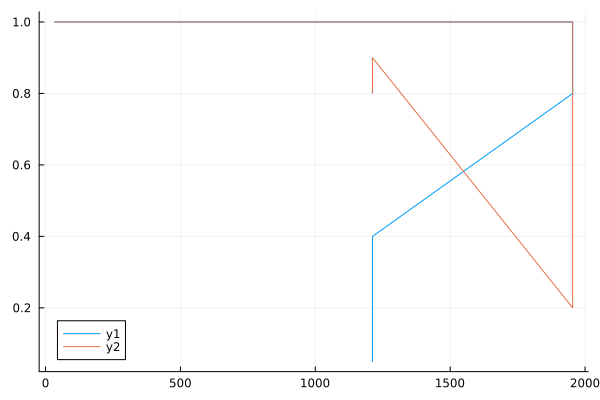

In [35]:
using Pkg 
Pkg.add("Plots")
using Plots
nb_iterations = [1212,1212,1212,1954,1954,579,34]
eta1 = [0.05 ,0.4 ,0.4 ,0.8  , 0.99999 ,0.999999, 0.99999999999999999999999  ]
eta2 = [0.9 ,0.8 ,0.9 ,0.2, 0.99999 , 0.999999999,1.0000000000000000000000000000001] 
plot( nb_iterations, [eta1,eta2])


| eta1 | eta2 |nb_iters |
|:----------------:|:----------------------------:|:-----------------|
|     0.05         |    0.7                       |     1212         |
|        0.25 |        .075                      |        1212          |
|       0.4  |     0.9                 |1212
|               0.4   | 0.8                   | 1212|
|               0.999999   | 0.999999999                  | 579|
|               0.999999   | 0.9999999999                   | 419|
|              0.99999999999999999999999  | 1.0000000000000000000000000000001                  | 34|




# Régions de confiance avec Gradient Conjugué
## Implémentation 

1. Implémenter l’algorithme du Gradient Conjugué Tronqué (fichier `Gradient_Conjugue_Tronque.jl`). Sa spécification est donnée ci-dessous.

In [13]:
include("Gradient_Conjugue_Tronque.jl")
#@doc Gradient_Conjugue_Tronque

Gradient_Conjugue_Tronque

2. Vérifier que les tests ci-dessous passent.

In [12]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_gct.jl")
include("../src/Gradient_Conjugue_Tronque.jl")

affiche = false

@testset "Test gct" begin
	tester_gct(affiche,Gradient_Conjugue_Tronque)
end;

Test Summary: | Pass  Total  Time
Test gct      |    9      9  1.5s


3. Intégrer l’algorithme du Gradient Conjugué Tronqué dans le code de régions de confiance (fichier `Regions_De_Confiance.jl`).

4. Décommenter les tests avec le gradient conjugué dans `tester_regions_de_confiance.jl` et vérifier que les tests passent.

In [30]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")

affiche = false

@testset "Test rc avec cauchy et gct" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

iters = 864.0
Test Summary:              | Pass  Total  Time
Test rc avec cauchy et gct |   30     30  1.3s


## Interprétation  
###  (conformément aux tests réalisés ci dessous : une proposition de réponses aux questions) 

1. Comparer la décroissance obtenue avec celle du pas de Cauchy, en imposant la sortie
dans l’algorithme au bout d’une itération seulement. Vous donnerez ci-après des résultats numériques. 
    1. Que remarquez vous ? <br>
    
         * On remarque que le gradient conjugue tronque offre une meilleure approximation dans certains cas et égale dans d'autres par rapport au pas de Cauchy. <br>
     

    2. Comparer la décroissance obtenue avec celle du pas de Cauchy dans le cas général.
    
       *  Dans le cas général, la décroissance obtenue par le gradient conjugué tronqué est meilleure et plus précise que celle obtenue par le pas de cauchy.



3. Quels sont les avantages et inconvénients des deux approches ?
   
   <h4> *  Pas de cauchy :  </h4>

        - Avantages : Necessite une seule itération donc un seul résultat. 

        - Incovénients : Moins précise, saturation de la boule dans plusieurs cas.

    
   <h4> * Gradient conjugue tronque : </h4>

       - Avantages : précision d'ordre supérieure, converge plus rapidement vers le minimum.

       - Incovénients : une complexité spatiale plus grande. 
 


In [31]:


using Markdown                             # Pour que les docstrings en début des fonctions ne posent
                                           # pas de soucis. Ces docstrings sont utiles pour générer 
                                           # la documentation sous GitHub


# Affichage les sorties de l'algorithme des Régions de confiance
function my_afficher_resultats(algo,nom_fct,point_init,xmin,fxmin,flag,sol_exacte,nbiters)
	println("-------------------------------------------------------------------------")
	printstyled("Résultats de : ",algo, " appliqué à ",nom_fct, " au point initial ", point_init, ":\n",bold=true,color=:blue)
	println("  * xsol = ",xmin)
	println("  * f(xsol) = ",fxmin)
	println("  * nb_iters = ",nbiters)
	println("  * flag = ",flag)
	println("  * sol_exacte : ", sol_exacte)
end


# Fonction f1

println("\n\n\nFonction f1")
# -----------
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
# la gradient de la fonction f1
grad_f1(x) = [4 * (x[1] + x[2] + x[3] - 3) + 2 * (x[1] - x[2]); 4 * (x[1] + x[2] + x[3] - 3) - 2 * (x[1] - x[2]) + 2*(x[2]-x[3]); 4*(x[1]+x[2]+x[3]-3)-2*(x[2]-x[3])]
# la hessienne de la fonction f1
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1, 1, 1]
options = []
x011 = [1; 0 ;8]
x012 = [12 ;3 ;-9]
x0 = [10; 3; -2.2]


xmin, f_min, flag, nb_iters = Regions_De_Confiance("gct", f1, grad_f1, hess_f1, x011, options)
my_afficher_resultats("gct", "f1", x011, xmin, f_min, flag, sol_exacte, nb_iters)


xmin, f_min, flag, nb_iters = Regions_De_Confiance("cauchy", f1, grad_f1, hess_f1, x011, options)
my_afficher_resultats("cauchy", "f1", x011, xmin, f_min, flag, sol_exacte, nb_iters)


xmin, f_min, flag, nb_iters = Regions_De_Confiance("gct", f1, grad_f1, hess_f1, x012, options)
my_afficher_resultats("gct", "f1", x012, xmin, f_min, flag, sol_exacte, nb_iters)


xmin, f_min, flag, nb_iters = Regions_De_Confiance("cauchy", f1, grad_f1, hess_f1, x012, options)
my_afficher_resultats("cauchy", "f1", x012, xmin, f_min, flag, sol_exacte, nb_iters)






Fonction f1
-------------------------------------------------------------------------
Résultats de : gct appliqué à f1 au point initial [1, 0, 8]:
  * xsol = [1.0, 1.0, 1.0]
  * f(xsol) = 0.0
  * nb_iters = 3
  * flag = 0
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : cauchy appliqué à f1 au point initial [1, 0, 8]:
  * xsol = [0.9999389818205328, 1.0000102958944665, 1.0000816099684005]
  * f(xsol) = 1.2079492253706104e-8
  * nb_iters = 33
  * flag = 2
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : gct appliqué à f1 au point initial [12, 3, -9]:
  * xsol = [1.0000000000000002, 1.0, 0.9999999999999994]
  * f(xsol) = 7.518830502887769e-31
  * nb_iters = 4
  * flag = 0
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : cauchy appliqué à f1 au point initial [12, 3, -9]:
  * xsol = [1.000

In [112]:
# Vos tests
#using Pkg; Pkg.add("LinearAlgebra"); Pkg.add("Markdown")
# using Documenter
using LinearAlgebra
using Markdown         

include("Gradient_Conjugue_Tronque.jl")
include("Regions_De_Confiance.jl")

# Affichage les sorties de l'algorithme des Régions de confiance
function my_afficher_resultats(algo,nom_fct,point_init,xmin,fxmin,flag,nbiters)
	println("-------------------------------------------------------------------------")
	printstyled("Résultats de : ",algo, " appliqué à ",nom_fct, " au point initial ", point_init, ":\n",bold=true,color=:blue)
	println("  * xsol = ",xmin)
	println("  * f(xsol) = ",fxmin)
	println("  * nb_iters = ",nbiters)
	println("  * flag = ",flag)
end

################# Test sur les problèmes de l'annexe 1################
# probleme 1
f1(x) = 2*(x[1]+x[2]+x[3]-3)^2 + (x[1]-x[2])^2 + (x[2]-x[3])^2
grad_f1(x) = [4*(x[1]+x[2]+x[3]-3) + 2*(x[1]-x[2]);4*(x[1]+x[2]+x[3]-3) - 2*(x[1]-x[2]) + 2*(x[2]-x[3]) ;4*(x[1]+x[2]+x[3]-3) - 2*(x[2]-x[3]) ]
hessienne_f1(x) = [6. 2. 4. ; 2. 8. 2. ; 4. 2. 6.] 

x011 = [1.; 0. ;0.]
x012 = [10. ;3. ;-2.2]

# probleme 2
f2(x) = 100(x[2]-x[1]^2)^2 + (1-x[1])^2
grad_f2(x) = [-400*x[1]*(x[2]-x[1]^2)-2*(1-x[1]); 200*(x[2]-x[1]^2)]
hessienne_f2(x) = [400*(3*x[1]^2 - x[2]) + 2    -400*x[1]   ; -400*x[1]   200]

x021 = [-1.2 ; 1.]
x022 = [10. ; 0.0]
x023 = [0 ; 1/200 + 1/(10)^12]

options = []
#####################################################################

# cas de f1 : gct et cauchy 
xmin,fxmin,flag,nb_iters = Regions_De_Confiance("gct",f1,grad_f1,hessienne_f1,x011,options)
my_afficher_resultats("Regions de confiance avec la méthode du gradient conjugué tronqué","f1",x011,xmin,fxmin,flag,nb_iters)


xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hessienne_f1,x011,options)
my_afficher_resultats("Regions de confiance avec la méthode du pas de cauchy","f1",x011,xmin,fxmin,flag,nb_iters)

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("gct",f1,grad_f1,hessienne_f1,x012,options)
my_afficher_resultats("Regions de confiance avec la méthode du gradient conjugué ","f1",x012,xmin,fxmin,flag,nb_iters)


xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hessienne_f1,x012,options)
my_afficher_resultats("Regions de confiance avec la méthode du  pas de cauchy","f1",x012,xmin,fxmin,flag,nb_iters)

# cas de f2 : gct et cauchy 

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("gct",f2,grad_f2,hessienne_f2,x021,options)
my_afficher_resultats("Regions de confiance avec la méthode du gradient conjugué tronqué","f2",x021,xmin,fxmin,flag,nb_iters)


xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f2,grad_f2,hessienne_f2,x021,options)
my_afficher_resultats("Regions de confiance avec la méthode du  pas de cauchy","f2",x021,xmin,fxmin,flag,nb_iters)

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("gct",f2,grad_f2,hessienne_f2,x022,options)
my_afficher_resultats("Regions de confiance avec la méthode du gradient conjugué tronqué","f2",x022,xmin,fxmin,flag,nb_iters)

xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f2,grad_f2,hessienne_f2,x022,options)
my_afficher_resultats("Regions de confiance avec la méthode du pas de cauchy","f2",x022,xmin,fxmin,flag,nb_iters)


xmin,fxmin,flag,nb_iters = Regions_De_Confiance("gct",f2,grad_f2,hessienne_f2,x023,options)
my_afficher_resultats("Regions de confiance avec la méthode du gradient conjugué tronqué","f2",x023,xmin,fxmin,flag,nb_iters)


xmin,fxmin,flag,nb_iters = Regions_De_Confiance("cauchy",f2,grad_f2,hessienne_f2,x023,options)
my_afficher_resultats("Regions de confiance avec la méthode du pas de cauchy","f2",x023,xmin,fxmin,flag,nb_iters)

-------------------------------------------------------------------------
Résultats de : Regions de confiance avec la méthode du gradient conjugué tronqué appliqué à f1 au point initial [1.0, 0.0, 0.0]:
  * xsol = [1.0000000000000002, 1.0000000000000002, 1.0000000000000004]
  * f(xsol) = 1.627025617018337e-30
  * nb_iters = 1
  * flag = 0
-------------------------------------------------------------------------
Résultats de : Regions de confiance avec la méthode du pas de cauchy appliqué à f1 au point initial [1.0, 0.0, 0.0]:
  * xsol = [1.0000558873349883, 0.999992420017735, 0.9999289527004819]
  * f(xsol) = 9.090411079109608e-9
  * nb_iters = 26
  * flag = 2
-------------------------------------------------------------------------
Résultats de : Regions de confiance avec la méthode du gradient conjugué  appliqué à f1 au point initial [10.0, 3.0, -2.2]:
  * xsol = [0.9999999999999996, 1.0, 1.0000000000000009]
  * f(xsol) = 1.3805065841367707e-30
  * nb_iters = 3
  * flag = 0
---------

In [27]:
# Vos tests
#using Pkg; Pkg.add("LinearAlgebra"); Pkg.add("Markdown")
# using Documenter
using LinearAlgebra
using Markdown         

include("Gradient_Conjugue_Tronque.jl")
include("Pas_De_Cauchy.jl")

# Affichage les sorties de l'algorithme des Régions de confiance
function my_afficher_resultats(algo,nom_fct,s,delta,g,H,min_quadratique)
	println("-------------------------------------------------------------------------")
	printstyled("Résultats de : ",algo, " appliqué à la quadratique ",nom_fct, " définie par : le rayon ", delta, ":\n",bold=true,color=:blue)
	println("  * Le gradient associé à la quadratique ",nom_fct," = ",g)
	println("  * La matrice hessienne associée à la quadratique ",nom_fct," = ",H)
 	println("  * s = ",s)
	println("  * Le minimum de la quadratique  ",nom_fct," = ",min_quadratique)

end

g1 = [6. ; 2.]
g2 = [-2. ; 1.]

#Les matrices hessienes 
H1 = [ 7. 0. ; 0. 2.]
H2 = [-2. 0. ; 0. 10.]

q1(s) = transpose(g1) * s + (1/2) * transpose(s) * H1 * s
q2(s) = transpose(g2) * s + (1/2) * transpose(s) * H2 * s

delta = 15.

s_cauchy1 = Pas_De_Cauchy(g1,H1,delta) 
s_cauchy2 = Pas_De_Cauchy(g2,H2,delta)

s_gc1 = Gradient_Conjugue_Tronque(g1,H1, [delta,1,1e-6])
s_gc2 = Gradient_Conjugue_Tronque(g2,H2, [delta,1,1e-6])


my_afficher_resultats("Gradient Conjugue Tronque","q1",s_gc1,delta,g1,H1,q1(s_gc1))
my_afficher_resultats("Pas De Cauchy","q1",s_cauchy1[1],delta,g1,H1,q1(s_cauchy1[1]))
my_afficher_resultats("Gradient Conjugue Tronque","q2",s_gc2,delta,g2,H2,q2(s_gc2))
my_afficher_resultats("Pas De Cauchy","q2",s_cauchy2[1],delta,g2,H2,q2(s_cauchy2[1]))


-------------------------------------------------------------------------
Résultats de : Gradient Conjugue Tronque appliqué à la quadratique q1 définie par : le rayon 15.0:
  * Le gradient associé à la quadratique q1 = [6.0, 2.0]
  * La matrice hessienne associée à la quadratique q1 = [7.0 0.0; 0.0 2.0]
  * s = [0.0, 0.0]
  * Le minimum de la quadratique  q1 = 0.0
-------------------------------------------------------------------------
Résultats de : Pas De Cauchy appliqué à la quadratique q1 définie par : le rayon 15.0:
  * Le gradient associé à la quadratique q1 = [6.0, 2.0]
  * La matrice hessienne associée à la quadratique q1 = [7.0 0.0; 0.0 2.0]
  * s = [-0.9230769230769234, -0.30769230769230776]
  * Le minimum de la quadratique  q1 = -3.076923076923077
-------------------------------------------------------------------------
Résultats de : Gradient Conjugue Tronque appliqué à la quadratique q2 définie par : le rayon 15.0:
  * Le gradient associé à la quadratique q2 = [-2.0, 1.0]

# cas général 
Avec la fonction f1 on a ce petit recap pour 2 points  [1; 0 ;8] ,
 [12 ;3 ;-9] , [1.; 0. ;0.] ,  [10. ;3. ;-2.2]


On en tire les memes resultats pour les autres cas conformément aux tests ci dessus 


| nombre iterations gct  | nombres iterations cauchy |décroissance | précision|
|:----------------:|:----------------------------:|:-----------------|:--------------------|
|     3       |    33                      |     plus grande décroissance pour gct        | gct plus précise |
|        4|        25                   |        plus grande décroissance pour gct          | gct plus précise | 
|     1       |    26                      |     plus grande décroissance pour gct        | gct plus précise |
|        3 |        28                   |        plus grande décroissance pour gct          | gct plus précise | 
